# Introduction to the project
As an active music listener, I became interested in analyzing dataset of Spotify's Most Popular songs for 2010-2019.

What is the most popular music genre? What artist had most hits in the last decade? What are correlations between song variables?

## Import the needed packages 

In [17]:
# install the packages 
! pip install numpy pandas matplotlib seaborn

In [11]:
# Data manipulation packages
import numpy as np
import pandas as pd 

# Data visualisation packages 
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams

C:\Users\wajih\AppData\Roaming\Python\Python38\site-packages\mpl_toolkits\mplot3d\__init__.py:1: MatplotlibDeprecationWarning: 
The deprecated function was deprecated in Matplotlib 3.4 and will be removed two minor releases later.
  from .axes3d import Axes3D


## Dataset exploration

* Ensure that data is loaded correctly below with the right encodings.

In [4]:
# read the dataset
df = pd.read_csv('dataset.csv',encoding='ISO-8859-1')
df = df.iloc[:,1:] # Ingore the first "unamed column"
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


* Check the dataset shape.

In [7]:
df.shape

(603, 14)

* Explore Dataframe columns

In [8]:
print("Dataframe columns:",list(df.columns))

Dataframe columns: ['title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']


* Full summry for : Non-null count per column , column type

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      603 non-null    object
 1   artist     603 non-null    object
 2   top genre  603 non-null    object
 3   year       603 non-null    int64 
 4   bpm        603 non-null    int64 
 5   nrgy       603 non-null    int64 
 6   dnce       603 non-null    int64 
 7   dB         603 non-null    int64 
 8   live       603 non-null    int64 
 9   val        603 non-null    int64 
 10  dur        603 non-null    int64 
 11  acous      603 non-null    int64 
 12  spch       603 non-null    int64 
 13  pop        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 66.1+ KB


* Dataset summary statistics for all columns

In [9]:
df.describe(include = "all")

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603,603,603,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
unique,584,184,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Sugar,Katy Perry,dance pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,17,327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,NaN,NaN,NaN,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,NaN,NaN,NaN,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,NaN,NaN,NaN,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,NaN,NaN,NaN,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000


* Check for any missing values.

In [5]:
df.isnull().any()

title        False
artist       False
top genre    False
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
pop          False
dtype: bool

* No Null values were detected in the dataset.

## Dataset Description 

* This dataset represents the top songs **BY YEAR in the world by spotify**. This dataset has several variables about the songs and is based on Billboard. 

## Columns description : 
* bpm : Beats.Per.Minute - The tempo of the song.
* nrgy : Energy- The energy of a song - the higher the value, the more energtic. song
* dnce : Danceability - The higher the value, the easier it is to dance to this song.
* dB : Loudness..dB.. - The higher the value, the louder the song
* live : Liveness - The higher the value, the more likely the song is a live recording

## How many songs, artists and genres in this dataset?

In [3]:

number_songs=df.title.nunique()
number_artists=df.artist.nunique()
number_genres=df['top genre'].nunique()

print('There are', number_songs,'songs,', number_artists,'artists and',number_genres,'genres in the dataset.')


There are 584 songs, 184 artists and 50 genres in the dataset.


# Popular artists

* Check what artists had the most hits for past decade.

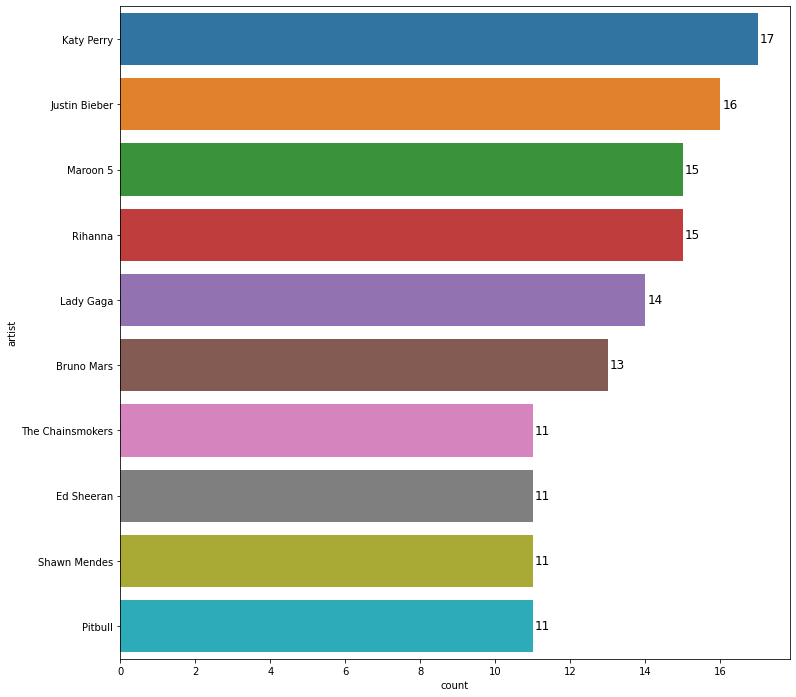

In [12]:
rcParams['figure.figsize'] =12,12

ax = sb.countplot(y=df['artist'],order=df.artist.value_counts().iloc[:10].index)
for container in ax.containers:
    ax.bar_label(container, padding=2, fontsize = 12)

> * Artists with most hits are Katy Perry(17 songs) , Justin Bieber(16 songs) , Rihanna & Maroon 5(both 15 songs).

# Popular genres

* Check most popular genres for past decade.

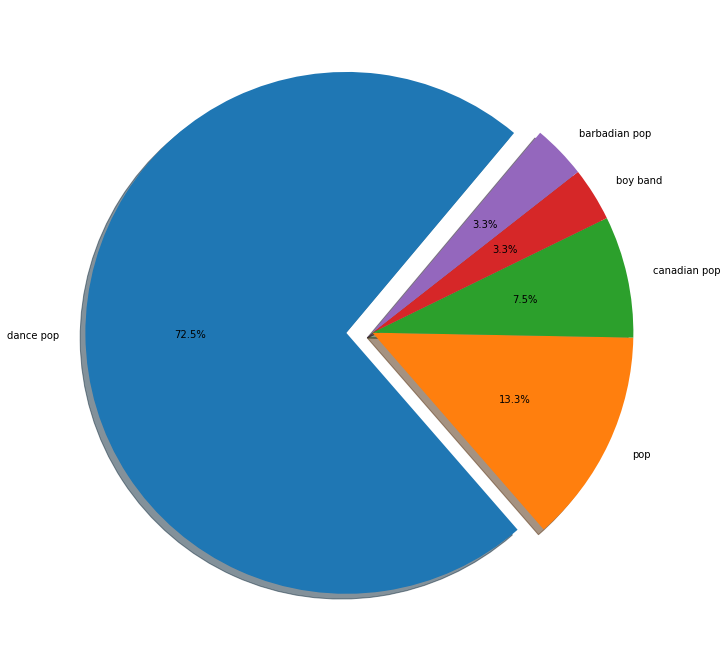

In [5]:
genres_piechart=plt.pie(df['top genre'].value_counts().iloc[:5],explode=[0.1,0,0,0,0] ,labels=df['top genre'].value_counts().iloc[:5].index,
autopct='%1.1f%%', shadow=True, startangle=50)

> * We see that 'Pop' genres dominated last decade in Spotify.
> * 'Dance pop' is the most prevalent genre in the last decade. 'Pop' and 'Canadian pop' are second and third, respectively.

## Duration and BPM of songs

* Check the distribution of song duration and BPM (Beats per Minute) by plotting histograms.

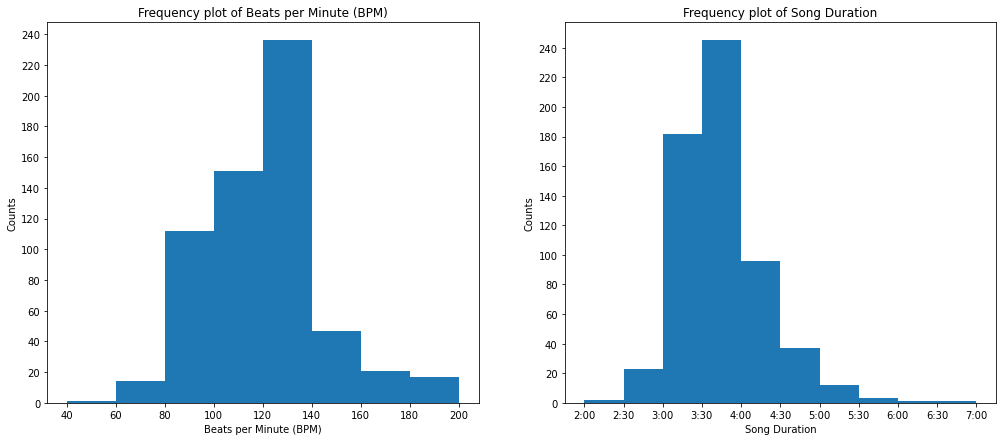

In [6]:
bpm_=df['bpm']
dur=df['dur']

rcParams['figure.figsize'] =17,7

#BPM
fig, (ax1,ax2) =plt.subplots(1,2)
ax1.hist(bpm_,bins=np.arange(40, 210, step=20));
ax1.set_title('Frequency plot of Beats per Minute (BPM)')
plt.sca(ax1)
plt.xticks(np.arange(40, 210, step=20))
plt.yticks(np.arange(0, 250, step=20))
ax1.set_xlabel('Beats per Minute (BPM)');
ax1.set_ylabel('Counts');

#Duration
ax2.hist(dur,bins=np.arange(120, 450, step=30));
ax2.set_title('Frequency plot of Song Duration')
plt.sca(ax2)
plt.xticks(np.arange(120, 450, step=30),('2:00','2:30','3:00','3:30','4:00','4:30','5:00','5:30','6:00','6:30','7:00'))
plt.yticks(np.arange(0, 250, step=20))
ax2.set_xlabel('Song Duration');
ax2.set_ylabel('Counts');



> * Most songs had between 120 and 140 Beats per minute and the length from 3:30 to 4:00 minutes.

* Now, let's explore how BPM and duration of songs changed over the decade.

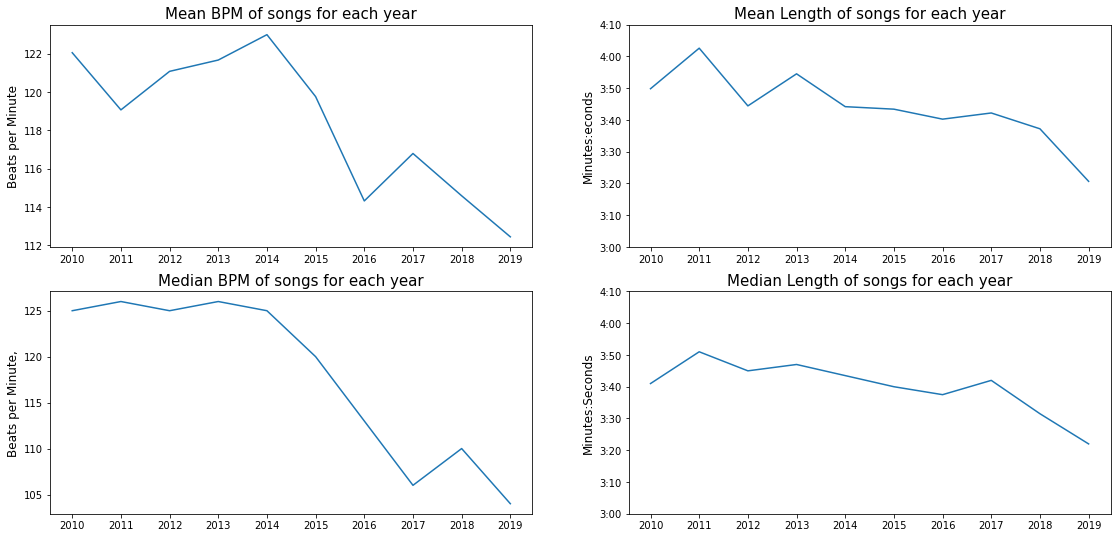

In [15]:
# plot mean and median BPM & duration of songs for each year.

bpm_mean=df['bpm'].groupby(df['year']).mean()
length_mean=df['dur'].groupby(df['year']).mean()

bpm_med=df['bpm'].groupby(df['year']).median()
length_med=df['dur'].groupby(df['year']).median()


rcParams['figure.figsize'] =19,9


fig, axs =plt.subplots(2,2);
#Mean
axs[0,0].plot(bpm_mean);
axs[0,0].set_title('Mean BPM of songs for each year',fontsize=15);
axs[0,0].set_ylabel('Beats per Minute',fontsize=12)
plt.sca(axs[0,0])
plt.xticks(np.arange(2010, 2020, step=1));

axs[0,1].plot(length_mean);
axs[0,1].set_title('Mean Length of songs for each year',fontsize=15);
axs[0,1].set_ylabel('Minutes:econds',fontsize=12)
plt.sca(axs[0,1])
plt.xticks(np.arange(2010, 2020, step=1));
plt.yticks(np.arange(180, 260, step=10),('3:00','3:10','3:20','3:30','3:40','3:50','4:00','4:10'));

#Median
axs[1,0].plot(bpm_med);
axs[1,0].set_title('Median BPM of songs for each year',fontsize=15);
axs[1,0].set_ylabel('Beats per Minute,',fontsize=12)
plt.sca(axs[1,0])
plt.xticks(np.arange(2010, 2020, step=1));


axs[1,1].plot(length_med);
axs[1,1].set_title('Median Length of songs for each year',fontsize=15);
axs[1,1].set_ylabel('Minutes:Seconds',fontsize=12)
plt.sca(axs[1,1])
plt.xticks(np.arange(2010, 2020, step=1));
plt.yticks(np.arange(180, 260, step=10),('3:00','3:10','3:20','3:30','3:40','3:50','4:00','4:10'));


> **Key takeaways from above graphs:**
>  1. For BPM, Mean graph shows that BPM soared to 123 in year 2014 and later decreased to 112 in year 2019. Median graph shows that there is a huge drop drom 125 BPM in 2014 to 105 BPM in 2017.
>  2. For song length, mean graph shows that songs became shorter from around 3:55 minutes at the beginning of decade to approximately 3:20 minutes at the end of decade. This is half a minute decrease in song length. Median graph shows the slow and gradual decrease in song durations with few upticks in 2011 and 2017.

# Correlation

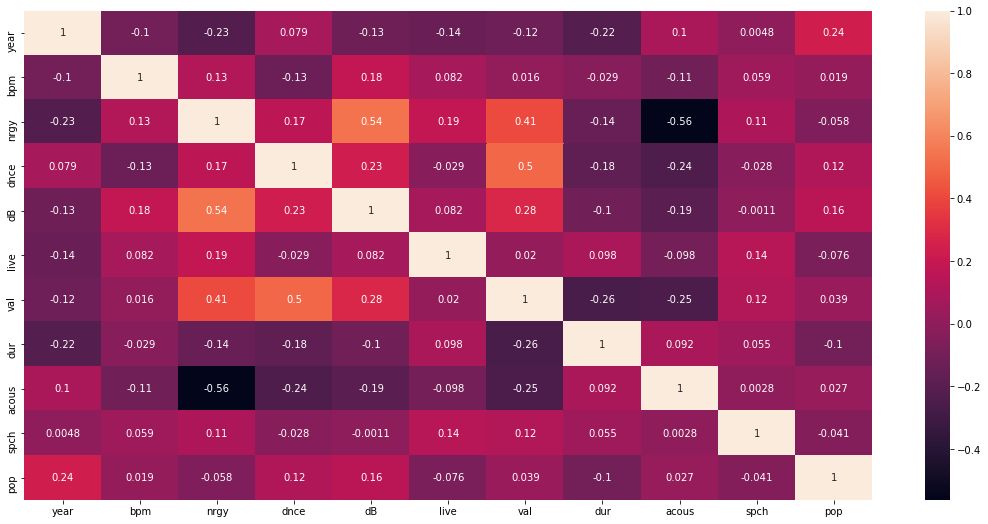

In [8]:
corr_matrix=df.corr()
corr_matrix
sb.heatmap(corr_matrix, annot=True);

> * Highest positive correlations are between 'dB' & 'nrgy' (0.54), 'val' & 'dnce' (0.5) and 'val' & 'nrgy' (0.41). These are considered to be moderate type of correlation. Highest negative correlation is between 'dB' and 'acous' (-0.56).